In [1]:
library(ggplot2)
library(gridExtra)

In [2]:
all_models  <-  list()

In [3]:
modelz  <-  c('model1_ar(2)_lin',
'model2_ar(12)_lin',
'model3_ar(12)_poly',
'model4_ari',
'model5_arma',
'model6_arima',
'model7_auto.arima',
'model8_ets',
'model9_auto.ets',
'model_10_tbats')

In [4]:
for (i in 1:length(modelz)){
    all_models[[i]]  <- readRDS(paste(modelz[i],'all_models_list.rds', sep='/'))
}

# paramz = readRDS("df_params.rds")

al_models

models 1-6 - arimas
models 8 - ets

levels:
- global model
- country
- type
- iteration
- model

In [5]:
top_models  <-  readRDS("top_models_list.rds")

levels:
- global model
- country
- iteration
- model

In [6]:
top_global  <-  list()
for (i in c(1:6,8)){ # global model
    pp=1
    if (i==8){
        pp = 11
    }
    all_countries  <- list()
    for (j in 1:3){ # country
        all_iters  <- as.data.frame(top_models[[i]][[j]][[1]][[1]]) 
        for (k in 2:length(top_models[[i]][[j]])){ #iteration
            all_iters  <-  cbind(as.data.frame(all_iters), as.data.frame(top_models[[i]][[j]][[k]][[pp]]))
        } 
        colnames(all_iters)  <-  seq(1,length(top_models[[i]][[j]]))
        all_countries[[j]]  <- t(all_iters)   
    }
    top_global[[i]]  <-  all_countries
}

- i - choose model
- all_countries[[country]][[type]][[iteration]][ ts_number , coef ]

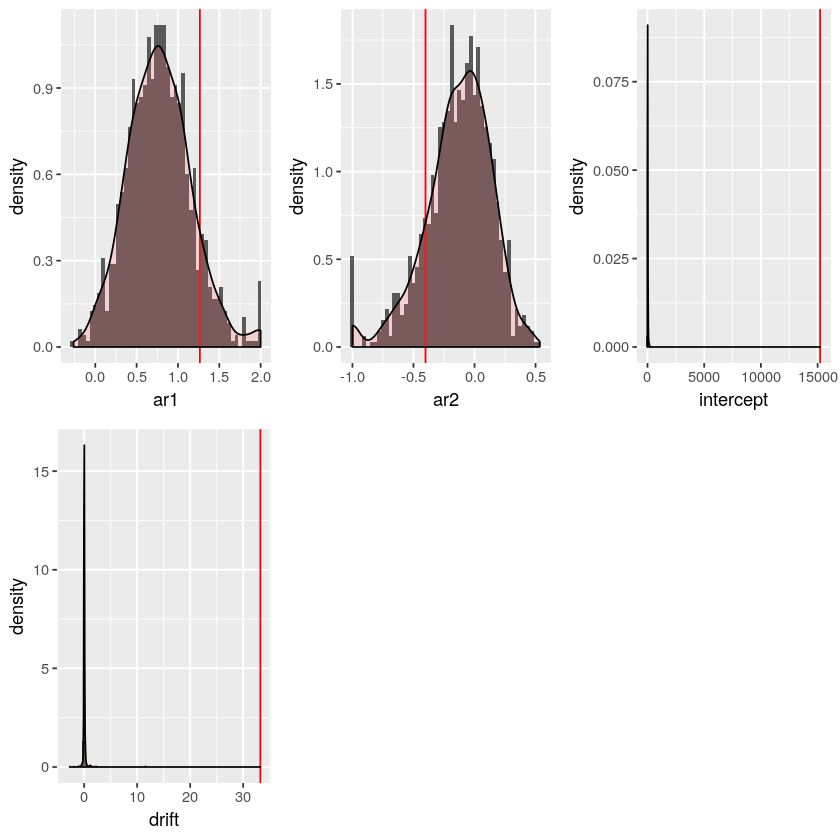

In [81]:
i  <-  2
var_country  <-  3
var_type  <- 1
var_iter  <- 3

all_countries  <- list()
for (j in 1:3){ # country
    all_types  <- list()
    for (l in 1:4){ #type
        all_hi  <- list()
        for (m in 1:length(all_models[[i]][[j]][[l]])){        
            all_iters  <- as.data.frame(all_models[[i]][[j]][[l]][[m]][[1]][[1]]) 
            for (k in 2:length(all_models[[i]][[j]][[l]][[m]])){ #iteration
            all_iters  <-  tryCatch(cbind(as.data.frame(all_iters), as.data.frame(all_models[[i]][[j]][[l]][[m]][[k]][[1]])),
                                    error = function(e)  {cbind(as.data.frame(all_iters), NA)}
        )} 
            colnames(all_iters)  <-  seq(1,dim(all_iters)[2])
#             all_types[[l]]  <- t(all_iters)
            all_hi[[m]]  <- t(all_iters)
            }
            all_types[[l]]  <- all_hi   
}
all_countries[[j]]  <-  all_types
}


rows_top  <-  all_countries[[var_country]][[1]][[var_iter]][ 1 , ]

var_off = c(length(all_countries[[1]][[2]][[1]][,1]), 
length(all_countries[[2]][[2]][[1]][,1]), 
length(all_countries[[3]][[2]][[1]][,1]) )

rows_countries  <-  all_countries[[var_country]][[2]][[var_iter]][ 2:dim(all_countries[[var_country]][[2]][[var_iter]])[1] , ]
rows_types  <-     all_countries[[var_country]][[3]][[var_iter]][ 2:dim(all_countries[[var_country]][[3]][[var_iter]])[1] , ]
rows_clusters  <-  all_countries[[var_country]][[4]][[var_iter]][ 2:dim(all_countries[[var_country]][[4]][[var_iter]])[1] , ]
rows  <-  all_countries[[var_country]][[1]][[var_iter]][ (var_off[var_country]+1):dim(all_countries[[var_country]][[1]][[var_iter]])[1] , ]

# rows_top  <- as.data.frame(rows_top)

if (var_type==1){
    rows_type  <- as.data.frame(rows)
} else  if (var_type==2){
    rows_type  <-  as.data.frame(rows_countries)
} else if (var_type==3){
    rows_type  <- as.data.frame(rows_types)
} else if (var_type==4){
    rows_type  <- as.data.frame(rows_clusters)
}

coef_plots_list  <-  list()

plot_coefs  <-  function(rows_type, var_coef){
    ggplot(rows_type, aes(x=rows_type[,var_coef], y = stat(density))) + geom_histogram(bins = 50) + 
    geom_vline(aes(xintercept=rows_top[[var_coef]]), color="red") +
    geom_density(alpha=.2, fill="#FF6666", aes(x=rows_type[,var_coef])) +
    xlab(names(rows_top)[[var_coef]])
}
coef_plots_list <- lapply(c(1:length(rows_top)), plot_coefs, rows_type = rows_type)
grid.arrange(grobs = coef_plots_list, ncol = 3)